In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data = 'First Citizen'
n_samples = len(raw_data)
unique_chars = list(set(raw_data))
print(n_samples)
print(unique_chars)

13
['C', 'i', 't', 'z', 'e', 'n', 'r', 's', ' ', 'F']


In [3]:
# 문자를 정수로 변환하는 딕셔너리
char_to_int = { ch:i for i,ch in enumerate(unique_chars) }
# 정수를 문자로 변환하는 딕셔너리
int_to_char = { i:ch for i,ch in enumerate(unique_chars) }

print(char_to_int)
print(int_to_char)

{'r': 6, 'C': 0, 's': 7, 'i': 1, 'F': 9, 't': 2, 'n': 5, 'z': 3, ' ': 8, 'e': 4}
{0: 'C', 1: 'i', 2: 't', 3: 'z', 4: 'e', 5: 'n', 6: 'r', 7: 's', 8: ' ', 9: 'F'}


In [4]:
n_unique_chars = len(unique_chars)
input_dim = n_unique_chars
num_classes = n_unique_chars

print('number of unique chars : ',n_unique_chars)

number of unique chars :  10


In [5]:
seq_len = n_samples-1

In [6]:
#-------------------------------------------
# 매개변수 설정
#-------------------------------------------
# 미니배치 크기: 1
# 은닉층 크기: 16
# 학습률: 0.1
# 반복 수: 20
batch_size = 1
hidden_size = 16
learning_rate = 0.1
n_epochs = 200

In [7]:
x = raw_data[:-1]
print('input : ',x)
y = raw_data[1:]
print('output : ',y)

input :  First Citize
output :  irst Citizen


In [8]:
x_int = [char_to_int[n] for n in x]
print('input : ',x_int)
y_int = [char_to_int[n] for n in y]
print('output : ',y_int)

input :  [9, 1, 6, 7, 2, 8, 0, 1, 2, 1, 3, 4]
output :  [1, 6, 7, 2, 8, 0, 1, 2, 1, 3, 4, 5]


In [10]:
x_one_hot = tf.keras.utils.to_categorical(x_int, 
n_unique_chars).reshape(batch_size,seq_len, input_dim)

y_one_hot = tf.keras.utils.to_categorical(y_int, 
n_unique_chars).reshape(batch_size,seq_len, input_dim)

print('one hot input : ',x_one_hot.shape)
print('one hot input : ',y_one_hot.shape)

one hot input :  (1, 12, 10)
one hot input :  (1, 12, 10)


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(hidden_size,
                                  input_shape=[seq_len,input_dim],
                                  return_sequences=True),
    tf.keras.layers.Dense(num_classes,activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
num_classes

10

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 12, 16)            432       
_________________________________________________________________
dense (Dense)                (None, 12, 10)            170       
Total params: 602
Trainable params: 602
Non-trainable params: 0
_________________________________________________________________


In [13]:
x_one_hot.shape

(1, 12, 10)

In [14]:
history = model.fit(np.array(x_one_hot), np.array(y_one_hot), epochs=n_epochs)

Train on 1 samples
Epoch 1/200
1/1 [==============================] - 2s 2s/sample - loss: 2.4620 - accuracy: 0.0833
Epoch 2/200
1/1 [==============================] - 0s 4ms/sample - loss: 2.4412 - accuracy: 0.0833
Epoch 3/200
1/1 [==============================] - 0s 7ms/sample - loss: 2.4205 - accuracy: 0.0833
Epoch 4/200
1/1 [==============================] - 0s 6ms/sample - loss: 2.3998 - accuracy: 0.0833
Epoch 5/200
1/1 [==============================] - 0s 8ms/sample - loss: 2.3792 - accuracy: 0.0833
Epoch 6/200
1/1 [==============================] - 0s 7ms/sample - loss: 2.3588 - accuracy: 0.0833
Epoch 7/200
1/1 [==============================] - 0s 11ms/sample - loss: 2.3385 - accuracy: 0.1667
Epoch 8/200
1/1 [==============================] - 0s 6ms/sample - loss: 2.3183 - accuracy: 0.1667
Epoch 9/200
1/1 [==============================] - 0s 7ms/sample - loss: 2.2983 - accuracy: 0.1667
Epoch 10/200
1/1 [==============================] - 0s 9ms/sample - loss: 2.2784 - accurac

Epoch 83/200
1/1 [==============================] - 0s 16ms/sample - loss: 1.2382 - accuracy: 0.9167
Epoch 84/200
1/1 [==============================] - 0s 10ms/sample - loss: 1.2272 - accuracy: 0.9167
Epoch 85/200
1/1 [==============================] - 0s 11ms/sample - loss: 1.2163 - accuracy: 0.9167
Epoch 86/200
1/1 [==============================] - 0s 8ms/sample - loss: 1.2054 - accuracy: 0.9167
Epoch 87/200
1/1 [==============================] - 0s 11ms/sample - loss: 1.1946 - accuracy: 0.9167
Epoch 88/200
1/1 [==============================] - 0s 11ms/sample - loss: 1.1839 - accuracy: 1.0000
Epoch 89/200
1/1 [==============================] - 0s 11ms/sample - loss: 1.1732 - accuracy: 1.0000
Epoch 90/200
1/1 [==============================] - 0s 8ms/sample - loss: 1.1626 - accuracy: 1.0000
Epoch 91/200
1/1 [==============================] - 0s 10ms/sample - loss: 1.1521 - accuracy: 1.0000
Epoch 92/200
1/1 [==============================] - 0s 8ms/sample - loss: 1.1416 - accuracy: 

Epoch 164/200
1/1 [==============================] - 0s 11ms/sample - loss: 0.5755 - accuracy: 1.0000
Epoch 165/200
1/1 [==============================] - 0s 8ms/sample - loss: 0.5701 - accuracy: 1.0000
Epoch 166/200
1/1 [==============================] - 0s 6ms/sample - loss: 0.5648 - accuracy: 1.0000
Epoch 167/200
1/1 [==============================] - 0s 12ms/sample - loss: 0.5595 - accuracy: 1.0000
Epoch 168/200
1/1 [==============================] - 0s 9ms/sample - loss: 0.5543 - accuracy: 1.0000
Epoch 169/200
1/1 [==============================] - 0s 11ms/sample - loss: 0.5492 - accuracy: 1.0000
Epoch 170/200
1/1 [==============================] - 0s 7ms/sample - loss: 0.5441 - accuracy: 1.0000
Epoch 171/200
1/1 [==============================] - 0s 12ms/sample - loss: 0.5391 - accuracy: 1.0000
Epoch 172/200
1/1 [==============================] - 0s 9ms/sample - loss: 0.5341 - accuracy: 1.0000
Epoch 173/200
1/1 [==============================] - 0s 7ms/sample - loss: 0.5292 - acc

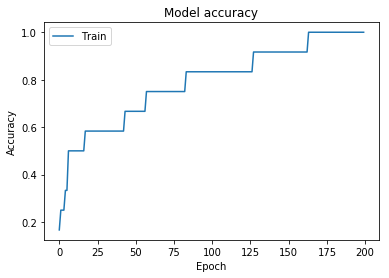

In [42]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [43]:
model.evaluate(x_one_hot, y_one_hot)

1/1 [==============================] - 0s 196ms/sample - loss: 0.0108 - accuracy: 1.0000


[0.01077305804938078, 1.0]

In [44]:
model.predict(x_one_hot)

array([[[2.19174344e-02, 5.18293940e-02, 2.94594951e-02, 6.40630364e-01,
         5.16798608e-02, 5.10814004e-02, 2.90251207e-02, 6.04958348e-02,
         1.26173571e-02, 5.12637347e-02],
        [1.63896196e-02, 5.75988479e-02, 1.01400996e-02, 6.42181113e-02,
         6.33030757e-03, 2.28819111e-03, 5.20870648e-02, 7.06729472e-01,
         1.70935057e-02, 6.71248510e-02],
        [1.34687899e-02, 6.07110560e-02, 1.33948140e-02, 3.83158051e-03,
         2.06244253e-02, 4.39456524e-03, 7.85694301e-01, 7.04807788e-02,
         1.17698517e-02, 1.56298894e-02],
        [1.60457660e-02, 7.73997784e-01, 2.02558041e-02, 2.30863895e-02,
         2.22665090e-02, 3.02356724e-02, 1.21746268e-02, 2.62365602e-02,
         3.44168283e-02, 4.12840694e-02],
        [7.73321152e-01, 3.31259891e-03, 1.54611869e-02, 7.87557438e-02,
         1.66154429e-02, 6.84499182e-03, 3.79689001e-02, 1.89686380e-02,
         3.52473669e-02, 1.35040954e-02],
        [5.45434933e-03, 3.44866663e-02, 2.70046089e-02, 9.4

In [52]:
import numpy as np
print('predict : ',np.argmax(model.predict(x_one_hot),axis=2))
print('true : ',y_int)

predict :  [[3 7 6 1 0 5 3 1 3 9 8 4]]
true :  [3, 7, 6, 1, 0, 5, 3, 1, 3, 9, 8, 4]
